In [1]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter

In [2]:
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB ,MultinomialNB,BernoulliNB
from sklearn.linear_model import LinearRegression ,LogisticRegression ,Log,Lasso
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier ,KNeighborsRegressor ,RadiusNeighborsClassifier
#from sklearn.cluster import KMeans ,AgglomerativeClustering ,FeatureAgglomeartion
from sklearn.neural_network import BernoulliRBM ,MLPClassifier ,MLPRegressor
from xgboost import XGBClassifier ,XGBRegressor

In [3]:
from sklearn.model_selection import train_test_split,GridSearchCV ,cross_val_score,validation_curve,KFold
from sklearn import model_selection

In [4]:
from sqlalchemy import create_engine
import pandas as pd

db_host = '18.136.56.185'
username ='dm_team'
pwd='dm_team123#'
db_name='project_itsm'

#Connecting to SQL DB
conn =create_engine('mysql+pymysql://'+username+':'+pwd+'@'+db_host+'/'+db_name)
conn.table_names()
query ='select * from dataset_list '
df =pd.read_sql(query,conn)
print(df.shape)
df.head(2)

df.columns

(46606, 25)


Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [5]:
query ='select * from dataset_list '
df =pd.read_sql(query,conn)
print(df.shape)
df.head(2)

df.columns

(46606, 25)


Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

### Data Cleaning

In [12]:
import numpy as np

#==========================CI_Cat================================
Counter(df.CI_Cat)
df.CI_Cat.isnull().sum()

#Replacing empty srting values of 111 records of CI_Cat column n dropping the same
df['CI_Cat'] = np.where((df['CI_Cat'] == '') ,np.nan ,df['CI_Cat'])

df.dropna(inplace =True)
Counter(df.CI_Cat)

#==========================CI_Name================================
Counter(df.CI_Name)
df.CI_Name.isnull().sum()

#==========================CI_Subcat================================
Counter(df.CI_Subcat)
df.CI_Subcat.isnull().sum()

#==========================WBS================================
Counter(df.WBS)

#==========================No_of_Reassignments================================
Counter(df.No_of_Reassignments)
df.No_of_Reassignments = np.where((df.No_of_Reassignments ==''),np.nan,df.No_of_Reassignments)
df.No_of_Reassignments.ffill(inplace=True)


#==========================No_of_Related_Incidents : replace empty values with '1'
Counter(df.No_of_Related_Incidents) 
df['No_of_Related_Incidents'] = np.where((df.No_of_Related_Incidents == ''),'1',df.No_of_Related_Incidents)

#==================== Closure_Code==============================================
Counter(df.Closure_Code)
df['Closure_Code'] = np.where((df.Closure_Code ==''),np.nan,df.Closure_Code)
df.dropna(inplace=True)

In [13]:
#==================== No_of_Related_Interactions==============================================
Counter(df.No_of_Related_Interactions)
df['No_of_Related_Interactions'] = np.where((df.No_of_Related_Interactions == ''),'0',df.No_of_Related_Interactions)


### Drop the Columns which are not required

In [14]:
DeleteColList = ['Incident_ID', 'Status','Impact', 'Urgency','number_cnt',
                 'KB_number','Alert_Status','Resolved_Time','Handle_Time_hrs',
                 'Related_Interaction','Related_Change']

df.drop(DeleteColList,inplace=True , axis=1)


### Delete the rows which are not incidents .SInce prediction task is scoped only for incidents


#### Tickets of Category type complaints ,RFC and RFI will be deleted

In [16]:
#======================Find the count of incident tickets

pd.crosstab(df.CI_Cat,df.Category,margins='all')

Category,complaint,incident,request for change,request for information,All
CI_Cat,,,,,
Phone,0,2,0,0,2
application,0,25370,1,7529,32900
applicationcomponent,0,5,0,0,5
computer,0,3084,0,99,3183
database,0,213,0,1,214
displaydevice,0,163,0,49,212
hardware,7,384,0,51,442
networkcomponents,0,95,0,12,107
officeelectronics,0,152,0,0,152


In [ ]:
df = df[df['Category'] ==  'incident']
df.shape

### Convert the data types

In [17]:
print( "Before Data Conversion : " ,df.info())

#====Convert data into correct datatype
convert_list = list(['No_of_Reassignments','No_of_Related_Incidents','No_of_Related_Changes'])
df[convert_list] = df[convert_list].apply(pd.to_numeric ,errors ='coerce')

print( "After Data Conversion : " ,df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46035 entries, 0 to 46605
Data columns (total 14 columns):
CI_Name                       46035 non-null object
CI_Cat                        46035 non-null object
CI_Subcat                     46035 non-null object
WBS                           46035 non-null object
Priority                      46035 non-null object
Category                      46035 non-null object
No_of_Reassignments           46035 non-null object
Open_Time                     46035 non-null object
Reopen_Time                   46035 non-null object
Close_Time                    46035 non-null object
Closure_Code                  46035 non-null object
No_of_Related_Interactions    46035 non-null object
No_of_Related_Incidents       46035 non-null object
No_of_Related_Changes         46035 non-null object
dtypes: object(14)
memory usage: 5.3+ MB
Before Data Conversion :  None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46035 entries, 0 to 46605
Data columns (t

### Check to see if all converted columns have a proper data.
### ----CrossTab--- helps to find data across different values of  data column

#### The total shoul match to 37748 ,all columns should have either an integer value or zero

In [ ]:
pd.crosstab(df.No_of_Reassignments ,df.Category ,margins='all')

In [ ]:
pd.crosstab(df.No_of_Related_Incidents ,df.Category ,margins=True)

### Convert all date columns into datatype Date ,if any blanks or errors it will convey to 'Nat'


In [18]:
df.Open_Time = pd.to_datetime(df.Open_Time ,dayfirst =True)
df.Reopen_Time = pd.to_datetime(df.Reopen_Time ,dayfirst =True)
df.Close_Time = pd.to_datetime(df.Close_Time ,dayfirst =True)


### Using Reopen time stamp to create a flag ( 0-Ticket was not reopened ,1-Ticket was  reopened)

In [19]:
Counter(df.Reopen_Time)
#df['Reopen_Time'] = np.where((df.Reopen_Time == 'NaT'),)

df.loc[df.Reopen_Time.isna()==True ,'t_ReOpenFlag']=0
df.loc[df.Reopen_Time.isna()==False,'t_ReOpenFlag']=1
Counter(df.Reopen_Time)

Counter({NaT: 43760,
         Timestamp('2013-12-02 12:31:00'): 1,
         Timestamp('2014-01-28 14:07:00'): 1,
         Timestamp('2014-02-11 14:50:00'): 1,
         Timestamp('2013-10-17 12:22:00'): 1,
         Timestamp('2013-12-04 13:58:00'): 1,
         Timestamp('2013-12-03 08:57:00'): 1,
         Timestamp('2014-01-24 15:20:00'): 1,
         Timestamp('2013-10-08 09:14:00'): 1,
         Timestamp('2014-01-03 14:14:00'): 1,
         Timestamp('2014-03-24 12:35:00'): 1,
         Timestamp('2013-04-10 09:15:00'): 1,
         Timestamp('2013-10-21 08:50:00'): 1,
         Timestamp('2013-11-18 09:46:00'): 1,
         Timestamp('2013-11-12 12:04:00'): 1,
         Timestamp('2013-05-17 09:08:00'): 1,
         Timestamp('2013-10-10 14:48:00'): 1,
         Timestamp('2014-03-05 08:34:00'): 1,
         Timestamp('2013-05-22 15:27:00'): 1,
         Timestamp('2013-08-12 10:16:00'): 1,
         Timestamp('2013-06-27 14:56:00'): 1,
         Timestamp('2013-06-20 14:23:00'): 1,
         Time

In [ ]:
pd.crosstab(df.t_ReOpenFlag ,df.Priority ,margins='all')

In [20]:
#Check is all the outcome variables are labled.
#Run the below commands sequentially to undestandthe final data set for missinng records

pd.crosstab(df.CI_Cat ,df.Priority ,margins='all')
pd.crosstab(df.CI_Subcat ,df.Priority ,margins='all')
pd.crosstab(df.CI_Name ,df.Priority ,margins='all')
pd.crosstab(df.Closure_Code ,df.Priority ,margins='all')
pd.crosstab(df.WBS ,df.Priority ,margins='all')
pd.crosstab(df.No_of_Reassignments ,df.Priority ,margins='all')
pd.crosstab(df.No_of_Related_Incidents ,df.Priority ,margins='all')
pd.crosstab(df.t_ReOpenFlag ,df.Priority ,margins='all')

Priority,1,2,3,4,5,NA,All
t_ReOpenFlag,,,,,,,
0.0,0,426,5030,21589,15393,1322,43760
1.0,3,12,197,989,1030,44,2275
All,3,438,5227,22578,16423,1366,46035


In [ ]:
#============Priority Column : remove NA records as der is no ascertain them

print("Count of Priority is NA : ", df[df['Priority']=='NA'].Priority.count())
df = df[df.Priority != 'NA']
print("Count of Priority post deletion of  NA : ", df[df['Priority']=='NA'].Priority.count())
df.shape
Counter(df.Priority)

### Remove all the dupliate records as it doesnt add variablity

In [ ]:
df.duplicated().sum()

In [21]:
df.drop_duplicates(inplace =True)
df.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Priority', 'Category',
       'No_of_Reassignments', 'Open_Time', 'Reopen_Time', 'Close_Time',
       'Closure_Code', 'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes', 't_ReOpenFlag'],
      dtype='object')

### Fetching tickect handled duration by taking difference of Close_Time and Open_Time

In [22]:
df['Handled_Time_days']= (df['Close_Time'] - df['Open_Time']).dt.days

#pd.Timedelta(df['Handle_Time_hrs'],unit='h').days
Counter(df['Handled_Time_days'])
df['Handled_Time_days'].describe()

count    46011.000000
mean         4.840647
std         18.929245
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        655.000000
Name: Handled_Time_days, dtype: float64

### Save the Cleaned file before encoding

In [ ]:
df.to_csv('C:\\Users\\Rakshu\\Desktop\Pyt\\ITSM_cleanedfile.csv',index=False)

### Delete Reopen_Time and  Category column

In [ ]:
df.columns

In [23]:
del_list=['Category']

df.drop(del_list ,inplace=True,axis=1)

In [24]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Priority,No_of_Reassignments,Open_Time,Reopen_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,t_ReOpenFlag,Handled_Time_days
0,SUB000508,subapplication,Web Based Application,WBS000162,4,26,2012-02-05 13:32:00,NaT,2013-11-04 13:51:00,Other,1,2,NaN,0.0,638
1,WBA000124,application,Web Based Application,WBS000088,3,33,2012-03-12 15:44:00,2013-12-02 12:31:00,2013-12-02 12:36:00,Software,1,1,NaN,1.0,629
2,DTA000024,application,Desktop Application,WBS000092,NA,3,2012-03-29 12:36:00,NaT,2014-01-13 15:13:00,No error - works as designed,1,1,NaN,0.0,655
3,WBA000124,application,Web Based Application,WBS000088,4,13,2012-07-17 11:49:00,NaT,2013-11-14 09:31:00,Operator error,1,1,NaN,0.0,484
4,WBA000124,application,Web Based Application,WBS000088,4,2,2012-08-10 11:01:00,NaT,2013-11-08 13:55:00,Other,1,1,NaN,0.0,455


In [ ]:
df=df.sort_index(axis=1)
df

#### Label Encodinng

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

#List of columns need to be Encoded

encoderlist =['CI_Cat','Closure_Code','WBS']

for i in encoderlist:
    df[i] = encoder.fit_transform(df[i])
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Priority,No_of_Reassignments,Open_Time,Reopen_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,t_ReOpenFlag,Handled_Time_days
0,SUB000508,11,Web Based Application,136,4,26,2012-02-05 13:32:00,NaT,2013-11-04 13:51:00,6,1,2,NaN,0.0,638
1,WBA000124,1,Web Based Application,70,3,33,2012-03-12 15:44:00,2013-12-02 12:31:00,2013-12-02 12:36:00,10,1,1,NaN,1.0,629
2,DTA000024,1,Desktop Application,74,NA,3,2012-03-29 12:36:00,NaT,2014-01-13 15:13:00,4,1,1,NaN,0.0,655
3,WBA000124,1,Web Based Application,70,4,13,2012-07-17 11:49:00,NaT,2013-11-14 09:31:00,5,1,1,NaN,0.0,484
4,WBA000124,1,Web Based Application,70,4,2,2012-08-10 11:01:00,NaT,2013-11-08 13:55:00,6,1,1,NaN,0.0,455


In [ ]:
df.info()
#Counter(df.Closure_Code)

### Checking Normality of variables to understand the requirement of transforming the variables

In [26]:
#Check the distribution of continous variables -None seem to be normal in distribution
ConVarList = ['CI_Cat','WBS','Closure_Code','t_ReOpenFlag','No_of_Reassignments','No_of_Related_Incidents','No_of_Related_Interactions']

ConVarStatus = df[ConVarList].agg(['skew','kurtosis','std','mean','min','median','max'])
print(ConVarStatus)


             CI_Cat         WBS  Closure_Code  t_ReOpenFlag  \
skew       1.428957    0.833190     -0.339910      4.156652   
kurtosis   0.176962   -0.672581     -0.657882     15.278423   
std        3.859810   69.500603      3.399524      0.216797   
mean       3.141923  107.422203      7.087740      0.049445   
min        0.000000    0.000000      0.000000      0.000000   
median     1.000000   73.000000      6.000000      0.000000   
max       11.000000  271.000000     13.000000      1.000000   

          No_of_Reassignments  No_of_Related_Incidents  \
skew                 4.805858                66.863938   
kurtosis            41.482453              6113.860576   
std                  2.280206                 0.544150   
mean                 1.142357                 1.017105   
min                  0.000000                 1.000000   
median               0.000000                 1.000000   
max                 46.000000                63.000000   

         No_of_Related_Interac

In [27]:
from scipy import stats

#The P> 0.05 for the variable to be normal(In this test null hypothesisis reverse of usual)
#None of the variables are normal We can look at log transforming those variables before being fed into the algorithms

NormalityStat = pd.DataFrame()
for i in ConVarList:
    print(i,stats.shapiro(df[i]))

CI_Cat (0.5614616870880127, 0.0)
WBS (0.8403604626655579, 0.0)
Closure_Code (0.9033034443855286, 0.0)
t_ReOpenFlag (0.22231906652450562, 0.0)
No_of_Reassignments (0.535767674446106, 0.0)
No_of_Related_Incidents (0.011551856994628906, 0.0)
No_of_Related_Interactions (0.017537057399749756, 0.0)


C:\Users\Rakshu\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Box plot of all the variables - to analysing the possibility of scaling

In [ ]:
df[ConVarList].describe()

In [ ]:
#The magnitude of variations between the variables is huge ,Variables have to be scaled

rcParams['figure.figsize'] = 25,8
df[ConVarList].boxplot()

### Basic Pie Chart of outcome variable

In [ ]:
#P1 ,P2 are in extreme minority as compared to P3 ,P4,P5
rcParams['figure.figsize'] = 10,5
df.Priority.value_counts(sort=False).plot.pie(labels=['P1','P2','P3','P4','P5'],legend=True)
plt.show()

In [ ]:
Counter(df.Priority)

### Analysing Ticket Resolution Durations

In [28]:
df.columns #=======================================================================
df['Handled_Time_days'].describe()

#Converting Ticket resolution  duration into bins (50 days each ).Check the frequency of each bin
custom_bucket_array = np.linspace(0,700,141)
df['Handled_Time_days_bins'] =pd.cut(df['Handled_Time_days'],custom_bucket_array)

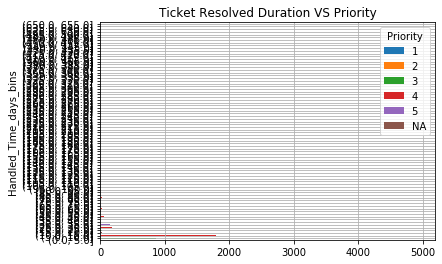

In [29]:
# SHow thw resolution of tickets has hanppened in duration of 5 days.
#Also Majority of P1/P2 have been solved in 5 days
Crosstab_AL =pd.crosstab(df.Handled_Time_days_bins,df.Priority)
Crosstab_AL.plot(kind='barh',stacked=False ,grid=True ,title='Ticket Resolved Duration VS Priority')

## Getting closer look on P1 and P2
#### Since the Results are skewed we can look at keeping 2 categories (High:P!,P2   and Low:P3,P4,P5

In [30]:
df_temp =df[(df.Priority==1) | (df.Priority==2)]
df_temp.shape
df.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Priority',
       'No_of_Reassignments', 'Open_Time', 'Reopen_Time', 'Close_Time',
       'Closure_Code', 'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes', 't_ReOpenFlag', 'Handled_Time_days',
       'Handled_Time_days_bins'],
      dtype='object')

In [31]:
#Majority of P1/P2  have been solved within 1.25 days
custom_bucket_array = np.linspace(0,25,101)
df_temp['t_P12_Handled_Time_days_bin'] =pd.cut(df_temp['Handled_Time_days'],custom_bucket_array)
Crosstab_AL =pd.crosstab(df_temp.t_P12_Handled_Time_days_bin,df.Priority)
print(Crosstab_AL)
df_temp.head()

Empty DataFrame
Columns: []
Index: []


,CI_Name,CI_Cat,CI_Subcat,WBS,Priority,No_of_Reassignments,Open_Time,Reopen_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,t_ReOpenFlag,Handled_Time_days,Handled_Time_days_bins,t_P12_Handled_Time_days_bin


### Analyse CI Category and Sub Category

Priority       1       2       3        4        5      NA
CI_Cat                                                    
0         0.0000  0.0022  0.0022   0.0000   0.0000  0.0000
1         0.0022  0.4216  8.7305  33.5833  26.5024  2.2234
2         0.0000  0.0000  0.0065   0.0022   0.0000  0.0022
3         0.0000  0.3782  0.6281   1.3453   4.3707  0.1913
4         0.0000  0.0000  0.3130   0.0348   0.0174  0.1000
5         0.0000  0.0000  0.0022   0.4369   0.0217  0.0000
6         0.0000  0.0130  0.3108   0.1717   0.3869  0.0782
7         0.0000  0.0478  0.0739   0.0674   0.0261  0.0174
8         0.0000  0.0000  0.0804   0.1413   0.0804  0.0283
9         0.0000  0.0065  0.2847   0.2412   0.1065  0.0848
10        0.0000  0.0109  0.4086   0.7520   0.2478  0.1087
11        0.0043  0.0717  0.5194  12.2536   3.9230  0.1348


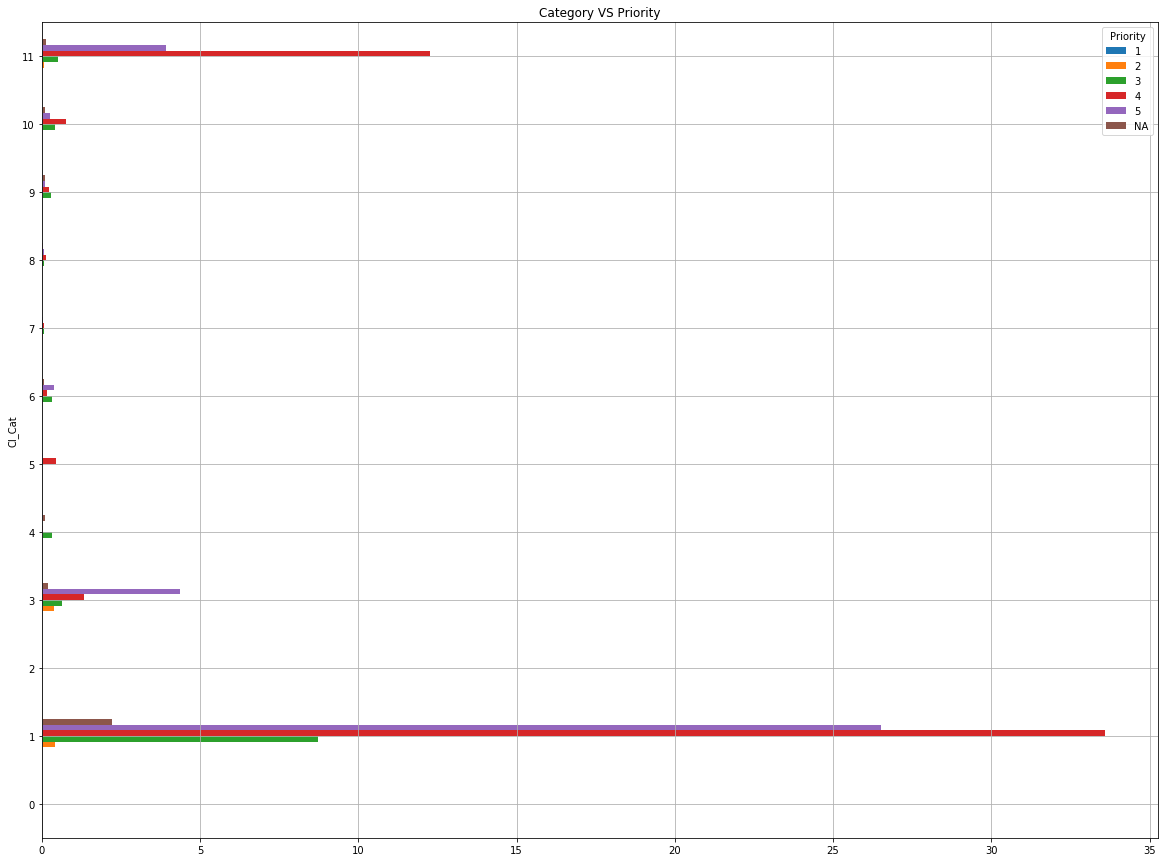

In [32]:
#68% belong to application and 18% belong tosubapplication category
#All P1's belong to the same category -applictation,subapp .P2 are spread across
#Since theOutcome classes are highly skewed ,we can look at records where P1 n P2 =0
rcParams['figure.figsize'] =20,15
Crosstab_Cat = pd.crosstab([df.CI_Cat],df.Priority,normalize='all').round(6)*100
print(Crosstab_Cat)
Crosstab_Cat.plot(kind='barh',stacked=False,grid=True ,title='Category VS Priority')

### Analyse Closure Code

Priority            1        2        3        4        5       NA
Closure_Code                                                      
0              0.0000   6.1644   4.7063   4.9470   4.4098   4.7584
1             33.3333  25.3425  12.2824   2.2341   9.5261  12.0791
2              0.0000   0.0000   0.1148   0.2527   0.5908   0.1464
3              0.0000   0.0000   0.0000   0.0000   0.0609   0.0000
4              0.0000   2.0548   6.0647   7.3762   8.8318   5.9297
5              0.0000   3.6530   2.8888   4.5658   1.8394   2.7818
6             33.3333  33.3333  25.5213  32.3241  44.4208  26.3543
7              0.0000   0.0000   0.0000   0.0000   0.0061   0.0000
8              0.0000   0.0000   0.0191   0.0576   0.7187   0.0000
9              0.0000   0.6849   0.4400   0.3369   0.2802   0.7321
10            33.3333  25.3425  24.1821  36.0610  19.3690  22.9868
11             0.0000   1.5982   4.1898   3.2936   3.4048   3.8067
12             0.0000   1.8265  18.0409   7.1546   4.4281  18.

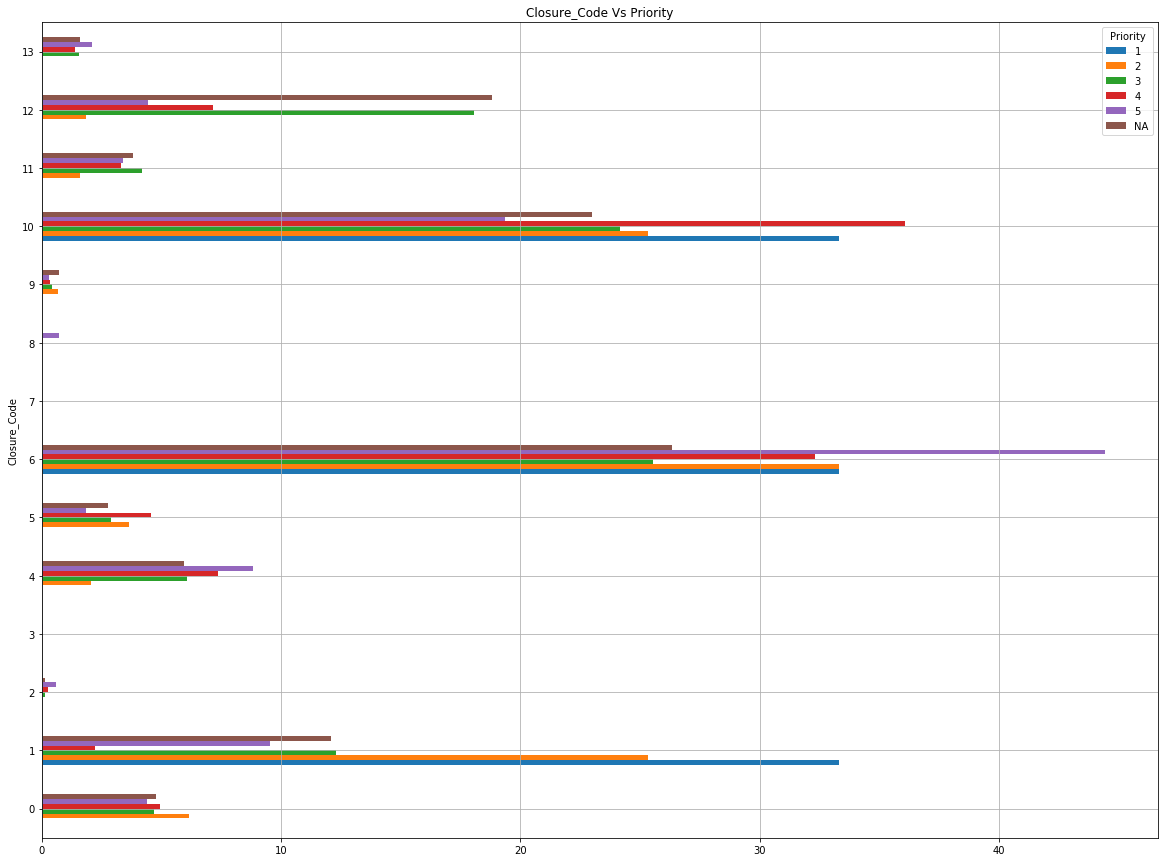

In [33]:
#Predominant reason for closure across P1-P5 is Hardware,Other,SOftware
Crosstab_CC = pd.crosstab(df.Closure_Code,df.Priority,normalize='columns').round(6)*100
print(Crosstab_CC)
Crosstab_CC.plot(kind='barh',stacked=False ,grid=True,title='Closure_Code Vs Priority')

### Analyse WBS : This cuould be interpreted as  a cost centrerelated t Dept

Priority    1       2       3       4       5      NA
WBS                                                  
0         0.0  0.0000  0.0000  0.0000  0.0022  0.0000
1         0.0  0.0000  0.0152  0.1913  0.1261  0.0087
2         0.0  0.0000  0.0000  0.0000  0.0022  0.0000
3         0.0  0.0000  0.0043  0.0435  0.0000  0.0000
4         0.0  0.0065  0.0304  0.0500  0.0087  0.0087
..        ...     ...     ...     ...     ...     ...
267       0.0  0.0000  0.0043  0.0000  0.0022  0.0022
268       0.0  0.0000  0.0000  0.0022  0.0000  0.0000
269       0.0  0.0022  0.0174  0.1739  0.0065  0.0000
270       0.0  0.0000  0.0000  0.0043  0.0043  0.0000
271       0.0  0.0000  0.0022  0.0000  0.0022  0.0000

[272 rows x 6 columns]


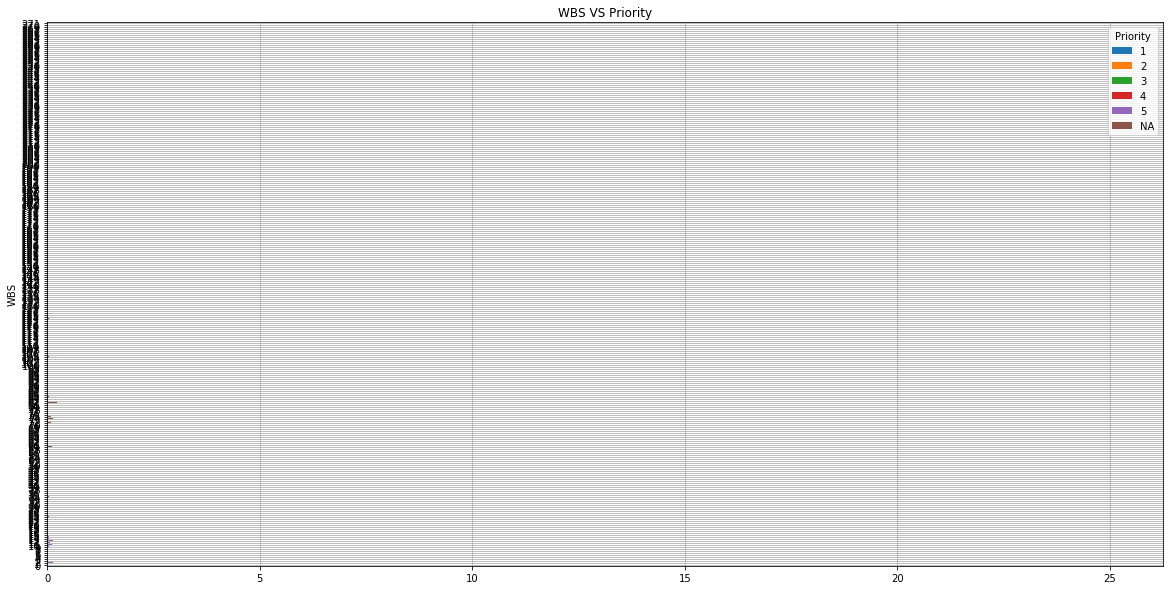

In [34]:
#Too many WBS's to get any meanigful insights
#Chrn Rate more than 2% and special care of with more than 3%
rcParams['figure.figsize'] =20,10
Crosstab_WBS = pd.crosstab([df.WBS],df.Priority,normalize='all').round(6)*100
print(Crosstab_WBS)
Crosstab_WBS.plot(kind='barh',stacked=False,grid=True ,title='WBS VS Priority')

### Analyse No of related interactions(No of interactions with client)`

Priority                         1       2        3        4        5      NA
No_of_Related_Interactions                                                   
0                           0.0000  0.0000   0.0087   0.0869   0.1521  0.0000
1                           0.0043  0.8020  10.5301  45.5282  32.6878  2.7928
10                          0.0000  0.0022   0.0043   0.0000   0.0000  0.0000
11                          0.0000  0.0022   0.0000   0.0022   0.0000  0.0000
118                         0.0000  0.0000   0.0000   0.0022   0.0000  0.0000
12                          0.0000  0.0065   0.0000   0.0043   0.0000  0.0022
13                          0.0000  0.0000   0.0022   0.0022   0.0022  0.0022
14                          0.0000  0.0022   0.0000   0.0022   0.0000  0.0000
15                          0.0000  0.0000   0.0022   0.0043   0.0000  0.0000
16                          0.0000  0.0022   0.0000   0.0022   0.0000  0.0000
17                          0.0000  0.0000   0.0000   0.0043   0

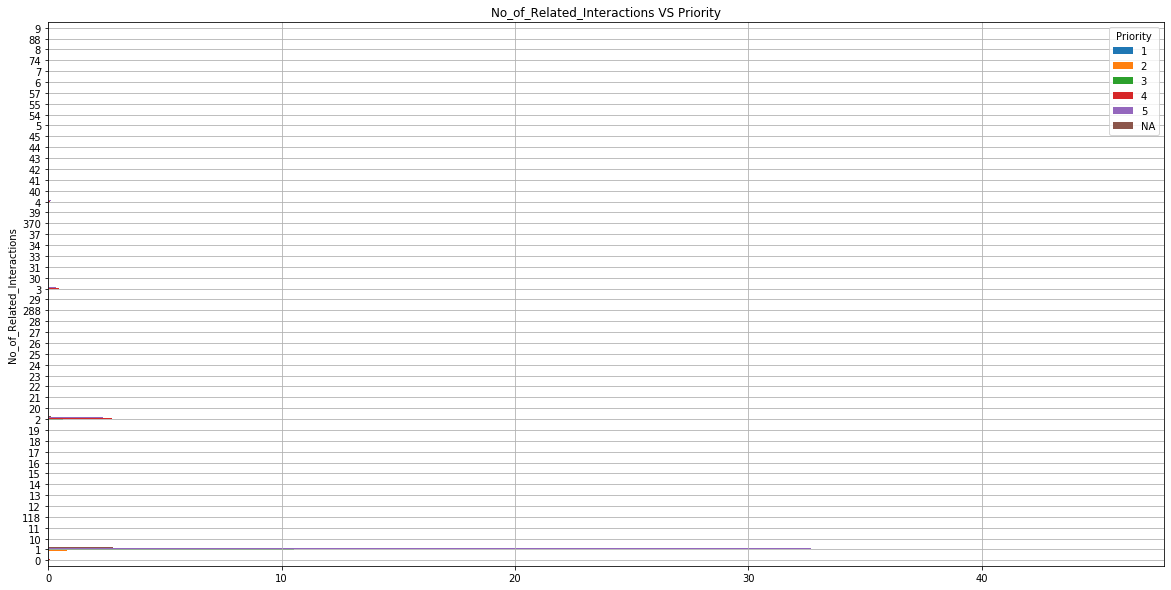

In [35]:
#No of interations are less in P1 and it increases as priority increases
rcParams['figure.figsize'] =20,10
Crosstab_NR = pd.crosstab([df.No_of_Related_Interactions],df.Priority,normalize='all').round(6)*100
print(Crosstab_NR)
Crosstab_NR.plot(kind='barh',stacked=False,grid=True ,title='No_of_Related_Interactions VS Priority')

### Analyse Ticket Repoen flag

Priority           1       2        3        4        5      NA
t_ReOpenFlag                                                   
0.0           0.0000  0.9259  10.9322  46.8801  33.4442  2.8732
1.0           0.0065  0.0261   0.4282   2.1495   2.2386  0.0956


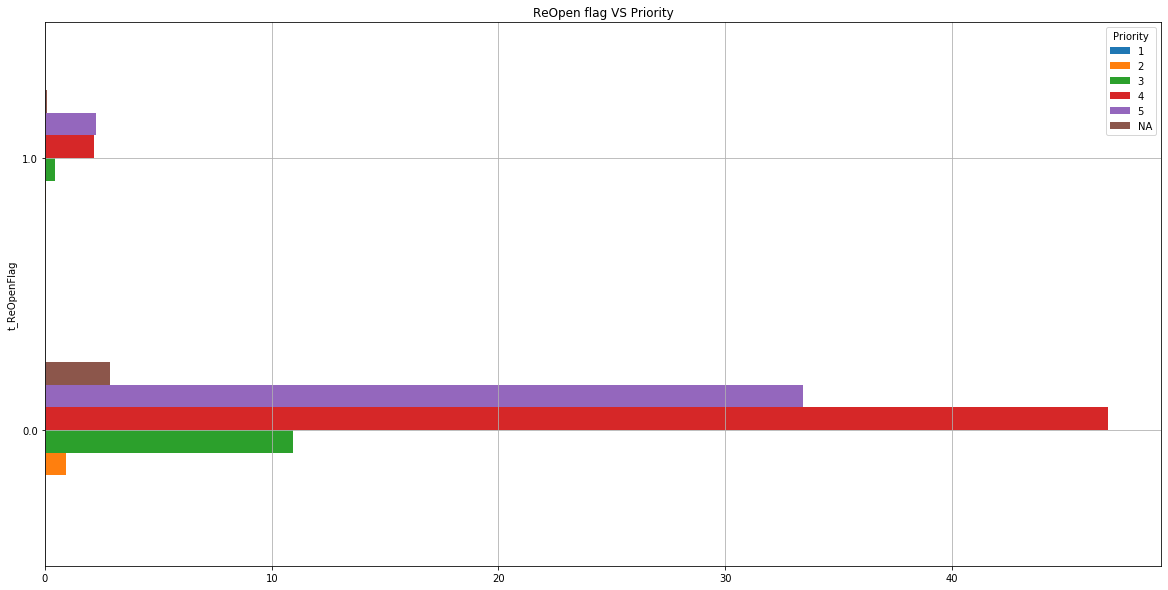

In [36]:
#ALl P1 tickets are reopened
rcParams['figure.figsize'] =20,10
Crosstab_Reopen = pd.crosstab([df.t_ReOpenFlag],df.Priority,normalize='all').round(6)*100
print(Crosstab_Reopen)
Crosstab_Reopen.plot(kind='barh',stacked=False,grid=True ,title='ReOpen flag VS Priority')

## Full COrrelation Matrix

In [37]:

CatVarList = ['CI_Cat' ,'CI_Subcat','CI_Name','Closure_Code','WBS','t_ReOpenFlag' ]
ConVarList = ['No_of_Reassignments' ,'No_of_Related_Incidents','No_of_Related_Interactions','Handled_Time_days']
DateVarList = ['Close_Time','Open_Time' ,'Reopen_Time']
OutValList =['Priority']

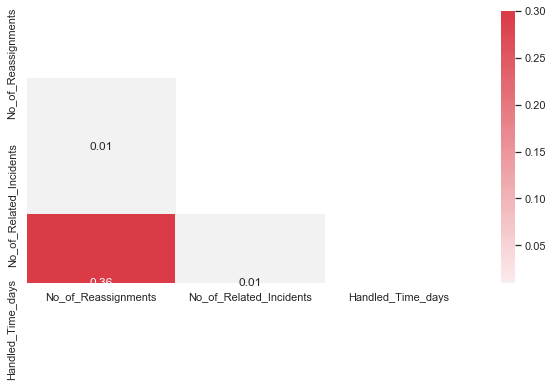

In [38]:
#Run Correlation on continuous variable
Corr_All = df[ConVarList].corr().round(2)

#Maskinng of upper triangle
sb.set(style="white")
mask = np.zeros_like(Corr_All,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Plotting
rcParams['figure.figsize'] =10,5
sb.heatmap(Corr_All,annot=True ,mask=mask,cmap = sb.diverging_palette(220,10,as_cmap=True),vmax=0.3,center=0)

#Correlation between the predictors is less hence none get deleted

In [ ]:
#There are 258 wbse whcih doesnot make sense as it cannot indicate any department hence we can delete it

df.drop('WBS',inplace=True,axis=1)
#df.columns

df=df.sort_index(axis=1)

## ML Model Selection

### K fold Cross Validation will be used for model selection

In [39]:

CatVarList = ['CI_Cat' ,'Closure_Code','t_ReOpenFlag' ]
ConVarList = ['No_of_Reassignments' ,'No_of_Related_Incidents','No_of_Related_Interactions','Handled_Time_days']
DateVarList = ['Close_Time','Open_Time']
OutValList =['Priority']

X_All =['CI_Cat' ,'Closure_Code','t_ReOpenFlag' ,
       'No_of_Reassignments' ,'No_of_Related_Incidents','No_of_Related_Interactions','Handled_Time_days']

In [40]:
#Assign X and Y

X = df.loc[:,X_All]
y=df.Priority


In [ ]:
X.columns

In [41]:
#split
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=10,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(36808, 7)
(36808,)
(9203, 7)
(9203,)


In [ ]:
y_train.head()

## Scaling done based on EDA analysis
### Fit on Train set , then transform noth train and test

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fit train data
scaler.fit(X_train)

#transform both train and test

scaler.transform(X_train)
scaler.transform(X_test)

array([[-0.55578752, -0.32081213, -0.22879835, ..., -0.0320127 ,
        -0.05407894, -0.20582057],
       [-0.55578752, -0.32081213, -0.22879835, ..., -0.0320127 ,
        -0.05407894, -0.26022402],
       [-0.55578752,  0.85729407,  4.37066083, ..., -0.0320127 ,
         0.30606899,  0.01179323],
       ...,
       [-0.55578752, -0.61533868, -0.22879835, ..., -0.0320127 ,
        -0.05407894, -0.26022402],
       [-0.55578752,  0.85729407, -0.22879835, ..., -0.0320127 ,
        -0.05407894, -0.26022402],
       [ 0.73774193, -1.79344488, -0.22879835, ..., -0.0320127 ,
        -0.05407894, -0.26022402]])

## Grid Search to Optimise the hyper PArameters


In [43]:
param = {"learning_rate" : [0.05,0.1,0.15],
         'max_depth':[3,5,8,10,15,20],
         'min_child_weight':[3,5,7],
         'gamma':[0.0,0.1],
         'colsample_bytree':[0.1,0.7,0.8],
         'scoring':["recall"]
         }
model =XGBClassifier(booster='gbtree',random_state=380)
grid_model_XGB =GridSearchCV(model,param)
grid_model_XGB.fit(X_train,y_train)

C:\Users\Rakshu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Rakshu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields No_of_Related_Interactions

  FitFailedWarning)


ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields No_of_Related_Interactions

## Modelling with RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

model_rf = RandomForestClassifier(max_depth= 15, n_estimators= 1000)
model_rf.fit(X_train,y_train)
Y_predict= model_rf.predict(X_test)

accuracy_score(y_test,Y_predict)

## Combaining P1 /P2 and P3/P4/P5 as 1/0

In [ ]:
df.loc[((df.Priority=='1') | (df.Priority=='2')),'Priority'] = 1
df.loc[((df.Priority=='3') | (df.Priority=='4')| (df.Priority=='5')),'Priority'] = 0

print(Counter(df.Priority))

## Balancing Imbalance Data Set
#### Since their exists imbalance in dataset(i.e Priority : 0: 35412, 1: 434)

In [ ]:
from imblearn.over_sampling import SMOTE
smote =SMOTE(k_neighbors=2)

X_train_sm,y_train_sm =smote.fit_sample(X_train,y_train)

#print(Counter(y_train_sm))
#print(X_train_sm)
type(X_train_sm)

In [6]:
#Convert SMote into DataFrame
X_train_sm =pd.DataFrame(X_train_sm,columns=['CI_Cat', 'Closure_Code', 't_ReOpenFlag', 'No_of_Reassignments',
       'No_of_Related_Incidents', 'No_of_Related_Interactions',
       'Handled_Time_days'])
y_train_sm=pd.DataFrame(y_train_sm,columns=['Priority'])

NameError: name 'pd' is not defined

In [ ]:
print(X_train_sm.shape)
print(y_train_sm.shape)
print(X_train_sm.columns)
print(y_train_sm.columns)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
                        
scaler = StandardScaler()

scaler.fit(X_train_sm)

X_train_sm =scaler.transform(X_train_sm)
X_train =scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [ ]:
print(X_train_sm.shape)
print(X_train.shape)
print(X_test.shape)

In [ ]:
print(X_train_sm.columns)
X_train.columns

### XGB with Smotted Data

In [5]:
grid_model_XGB = XGBClassifier(booster='gbtree',random_state=25,scoring='recall')
grid_model_XGB.fit(X_train_sm,y_train_sm)
y_predict = pd.DataFrame(grid_model_XGB.predict(X_test),columns=['Priority'])

print(accuracy_score(y_test,y_predict).round(4)*100)

NameError: name 'X_train_sm' is not defined

In [79]:
from sklearn.metrics import accuracy_score,recall_score,classification_report

print(accuracy_score(y_test,y_predict).round(4)*100)
#print(recall_score(y_test,y_predict).round(4)*100)
print(classification_report(y_test,y_predict))

54.81
              precision    recall  f1-score   support

           2       0.07      0.47      0.12        92
           3       0.35      0.41      0.37      1020
           4       0.69      0.55      0.62      4484
           5       0.56      0.59      0.57      3333

    accuracy                           0.55      8929
   macro avg       0.42      0.50      0.42      8929
weighted avg       0.60      0.55      0.57      8929



### XGB without SMotted Data

In [80]:
grid_model_XGB = XGBClassifier(booster='gbtree',randomm_state=25,scoring='recall')
grid_model_XGB.fit(X_train,y_train)
y_predict =pd.DataFrame(grid_model_XGB.predict(X_test),columns=['Priority'])

print(accuracy_score(y_test,y_predict).round(4)*100)
#print(recall_score(y_test,y_predict).round(4)*100)
print(classification_report(y_test,y_predict))

61.519999999999996
              precision    recall  f1-score   support

           2       0.36      0.09      0.14        92
           3       0.61      0.17      0.26      1020
           4       0.61      0.81      0.70      4484
           5       0.62      0.51      0.56      3333

    accuracy                           0.62      8929
   macro avg       0.55      0.39      0.42      8929
weighted avg       0.61      0.62      0.59      8929

